In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error


In [2]:
df = pd.read_csv("Global_Pollution_Analysis.csv")
df.head()



,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
count,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,2009.335000,180.62695,115.068100,76.488550,52891.68150,260.448700,24.878100,27.799700,24492.893550,9.43575,104.271300,35307.602400
std,5.765325,67.07331,47.580911,39.692727,27224.49169,147.141923,14.470892,12.361879,14421.356002,5.57567,56.906574,19481.714455
min,2000.000000,50.30000,31.130000,11.150000,1019.37000,11.730000,1.920000,5.040000,542.950000,0.53000,2.320000,1298.700000
25%,2004.000000,134.97250,74.550000,40.895000,31201.97250,118.355000,11.220000,17.700000,12843.882500,4.58250,60.960000,19525.020000
50%,2010.000000,183.38500,112.305000,78.600000,55299.15000,273.140000,25.355000,29.170000,24121.540000,9.22500,104.965000,35043.325000
75%,2014.000000,237.42500,157.477500,109.212500,74805.82500,384.957500,38.550000,37.072500,36516.232500,13.99750,150.930000,51629.547500
max,2019.000000,297.95000,199.320000,149.230000,99739.36000,499.980000,49.690000,49.560000,49852.280000,19.98000,198.820000,69143.140000


In [5]:
df.isnull().sum()


Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64

In [25]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r'[^a-z0-9]+', '_', regex=True)
)

print(df.columns.tolist())


['country', 'year', 'air_pollution_index', 'water_pollution_index', 'soil_pollution_index', 'industrial_emissions', 'energy_recovered_in_gwh', 'co2_emissions', 'renewable_energy', 'plastic_waste_produced_in_tons', 'energy_consumption_per_capita_in_mwh', 'population_in_millions', 'gdp_per_capita_in_usd', 'energy_recovery']


In [26]:
# Fill numeric missing values with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [27]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()

energy_like = [c for c in numeric_cols if 'energy' in c]
renewable_like = [c for c in numeric_cols if 'renew' in c]
industrial_like = [c for c in numeric_cols if 'indust' in c]
co2_like = [c for c in numeric_cols if 'co2' in c]

country_col = [c for c in df.columns if 'country' in c]

energy_col = energy_like[0]
renewable_col = renewable_like[0]
industrial_col = industrial_like[0] if len(industrial_like) > 0 else None
co2_col = co2_like[0] if len(co2_like) > 0 else None

print("Energy:", energy_col)
print("Renewable:", renewable_col)
print("Industrial:", industrial_col)
print("CO2:", co2_col)
print("Country:", country_col)


Energy: energy_recovered_in_gwh
Renewable: renewable_energy
Industrial: industrial_emissions
CO2: co2_emissions
Country: ['country']


In [28]:
df['energy_recovery'] = df[renewable_col] / (df[energy_col] + 1)


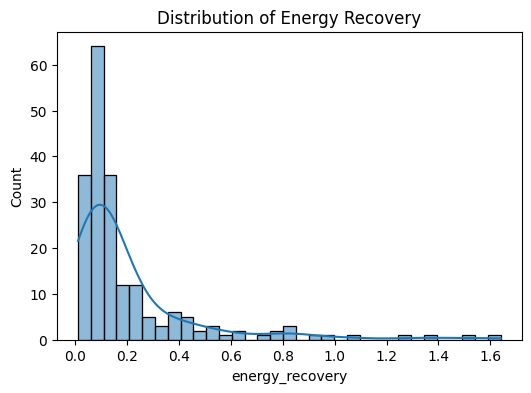

In [29]:
plt.figure(figsize=(6,4))
sns.histplot(df['energy_recovery'], kde=True)
plt.title("Distribution of Energy Recovery")
plt.show()


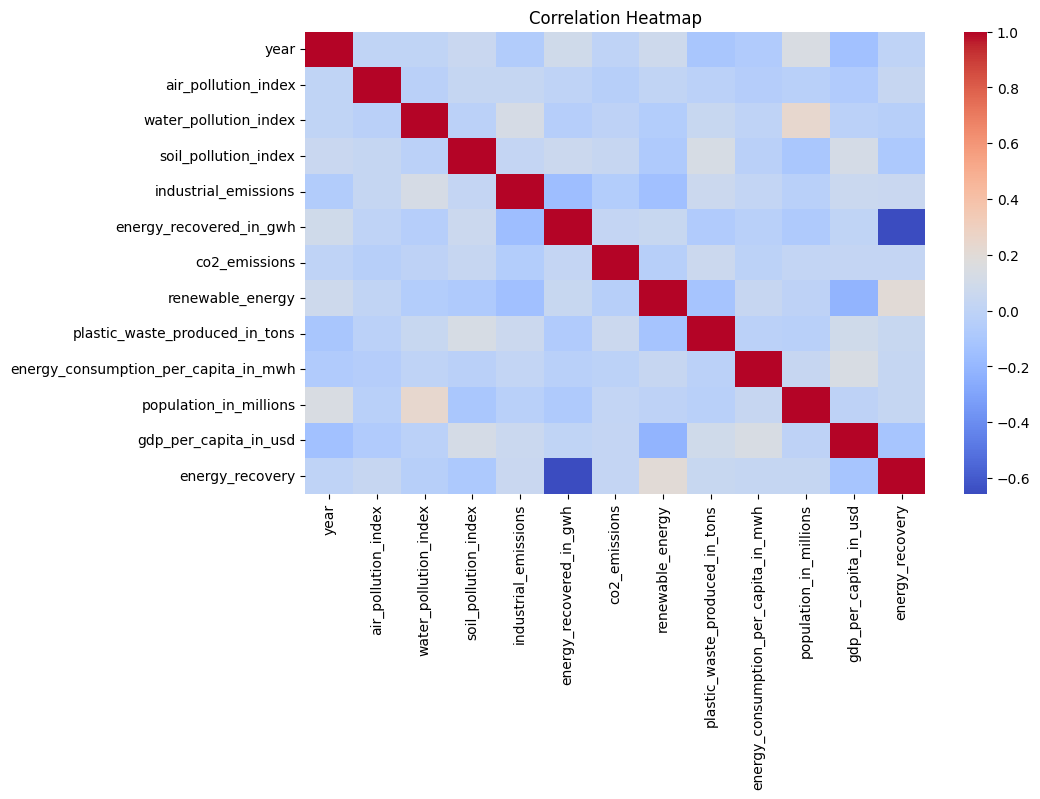

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


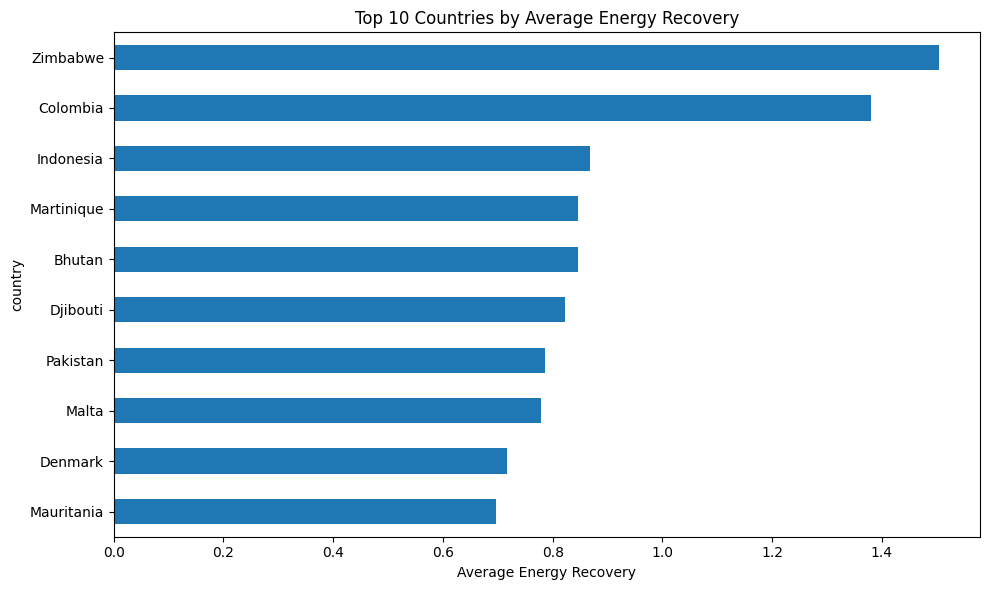

In [33]:
if len(country_col) > 0:
    country_avg = (
        df.groupby(country_col[0])['energy_recovery']
          .mean()
          .sort_values(ascending=False)
          .head(10)
    )

    plt.figure(figsize=(10,6))
    country_avg.sort_values().plot(kind='barh')
    plt.xlabel("Average Energy Recovery")
    plt.title("Top 10 Countries by Average Energy Recovery")
    plt.tight_layout()
    plt.show()


In [34]:
num_features = [energy_col, renewable_col]
if industrial_col:
    num_features.append(industrial_col)
if co2_col:
    num_features.append(co2_col)

cat_features = country_col

X = df[num_features + cat_features]
y = df['energy_recovery']


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [36]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
    ]
)


In [40]:
lr_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
lr_pred = lr_pipeline.predict(X_test)

lr_r2 = r2_score(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))


print("Linear Regression R²:", lr_r2)
print("Linear Regression RMSE:", lr_rmse)

import warnings
warnings.filterwarnings(
    "ignore",
    message="Found unknown categories in columns"
)


Linear Regression R²: -0.478283850103961
Linear Regression RMSE: 0.35039754355047703


In [41]:
ridge_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', Ridge(alpha=1.0))
])

ridge_pipeline.fit(X_train, y_train)
ridge_pred = ridge_pipeline.predict(X_test)

ridge_r2 = r2_score(y_test, ridge_pred)

print("Ridge Regression R²:", ridge_r2)


Ridge Regression R²: 0.5444814596086128


In [42]:
rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ))
])

rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)

rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest R²:", rf_r2)


Random Forest R²: 0.8468166831552296


In [43]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest'],
    'R² Score': [lr_r2, ridge_r2, rf_r2]
})

results


,Model,R² Score
0,Linear Regression,-0.478284
1,Ridge Regression,0.544481
2,Random Forest,0.846817


In [44]:
rf_model = rf_pipeline.named_steps['model']
feature_names = rf_pipeline.named_steps['preprocessing'].get_feature_names_out()

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance_df.head(10)


,Feature,Importance
0,num__energy_recovered_in_gwh,0.825454
1,num__renewable_energy,0.073036
3,num__co2_emissions,0.049339
2,num__industrial_emissions,0.016284
66,cat__country_Indonesia,0.011950
144,cat__country_Zimbabwe,0.008398
31,cat__country_Colombia,0.004942
88,cat__country_Moldova,0.003450
30,cat__country_Christmas Island,0.001230
74,cat__country_Latvia,0.000996


## Final Summary and Policy Recommendations

### Key Findings
• Linear models show limited explanatory power, indicating non-linear relationships.
• Including country information improves contextual understanding.
• Random Forest outperforms linear baselines, confirming complex interactions.

### Policy Implications
• Countries with higher renewable contribution show better recovery efficiency.
• Industrial emissions present opportunities for waste-to-energy initiatives.
• Country-specific policies significantly influence energy recovery outcomes.

### Limitations
• Energy recovery is derived using proxy indicators.
• Temporal dynamics are not captured.

### Future Work
• Include time-series modeling.
• Use direct recovery metrics if available.
• Apply Gradient Boosting or XGBoost.
